In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from metrics import *

In [2]:
tsne_results = pd.read_csv('data/tsne_rand_indices.csv')
pca_results = pd.read_csv('data/gmm_rand_indices.csv')

In [3]:
tsne_results.columns

Index(['Lemma', 'Principle Components', 'WordNet Mean', 'WordNet SD',
       'Random Mean', 'Random SD'],
      dtype='object')

In [4]:
rand_scores = tsne_results.merge(pca_results, on = ['Lemma', 'Principle Components'], suffixes = ('_tsne', '_pca'))

In [5]:
entropy = pd.read_csv("data/semcor_entropy.csv")
fmt_lemma = entropy[['word', 'pos']].apply(lambda r: r[0] + '.' +  r[1], axis = 1)
entropy.drop(['word', 'pos'], axis = 1, inplace = True)
entropy['Lemma'] = fmt_lemma

In [6]:
rand_entropy = rand_scores.merge(entropy, on = 'Lemma')
rand_entropy

,Lemma,Principle Components,WordNet Mean_tsne,WordNet SD_tsne,Random Mean_tsne,Random SD_tsne,WordNet Mean_pca,WordNet SD_pca,Random Mean_pca,Random SD_pca,entropy,num_senses,freq
0,thing.n,2,0.085159,0.010069,-0.000010,0.005422,0.022312,0.006362,-0.000266,0.005340,2.812869,8,264
1,thing.n,3,0.035802,0.007682,-0.000259,0.005234,0.046933,0.005681,-0.000031,0.005597,2.812869,8,264
2,meet.v,2,0.360236,0.020593,0.000152,0.007969,0.335335,0.014064,-0.000284,0.007645,2.774648,9,214
3,meet.v,3,0.093377,0.020518,0.000182,0.007424,0.371946,0.020921,-0.000075,0.007529,2.774648,9,214
4,lead.v,2,0.250580,0.022908,-0.000124,0.009570,0.269999,0.028585,0.000262,0.009356,2.684982,7,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,room.n,3,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.409073,2,122
1108,turn.v,2,0.092190,0.008947,0.000093,0.008654,0.099964,0.030226,-0.000048,0.008933,0.344389,2,171
1109,turn.v,3,0.050588,0.021087,0.000005,0.008473,-0.026628,0.003380,-0.000219,0.008501,0.344389,2,171
1110,good.a,2,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.326969,2,167


Getting rid of the words where the pipeline gave us only one sense

In [11]:
infreq = rand_entropy[(rand_entropy['Random Mean_pca'] == 1) | (rand_entropy['Random Mean_tsne'] == 1)]
rand_entropy = rand_entropy[~rand_entropy.index.isin(infreq.index)]
two_pc = rand_entropy[rand_entropy['Principle Components'] == 2]
three_pc = rand_entropy[rand_entropy['Principle Components'] == 3]
ent = two_pc['entropy'] #Same entropy values for both

In [96]:
def plot_metric_ri(x_col, df, method, dims):
    plt.scatter(df[x_col], df['Random Mean_' + method], label = 'random')
    plt.scatter(df[x_col], df['WordNet Mean_' + method], label = 'WN Senses', alpha = 0.3)
    plt.xlabel(x_col)
    plt.ylabel("Rand Index")
    plt.title("Rand Scores for GMMs fitted to " + method.upper() + " Embeddings " + "vs. " + x_col + '(' + dims + ')')
    plt.legend()


In [31]:
len(two_pc.index)

461

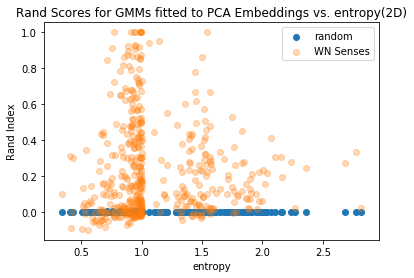

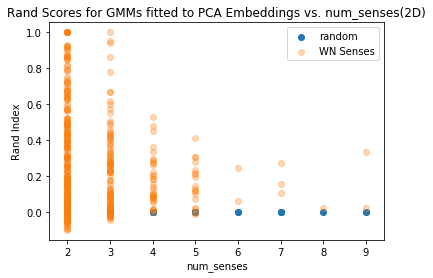

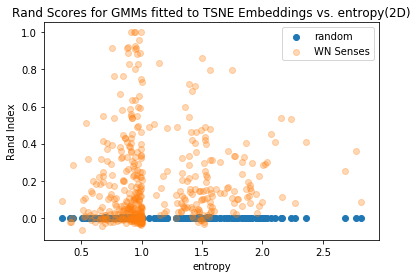

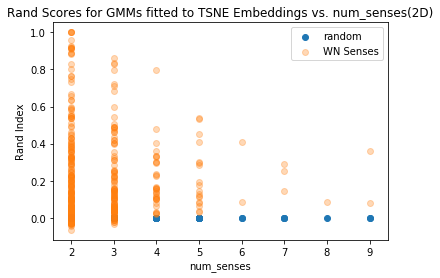

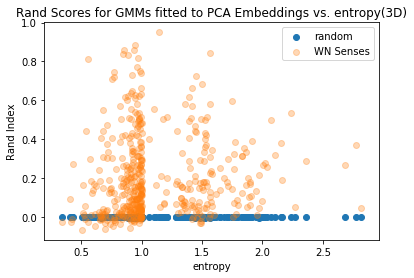

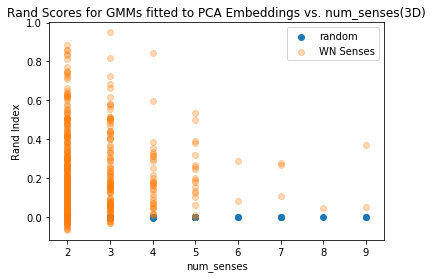

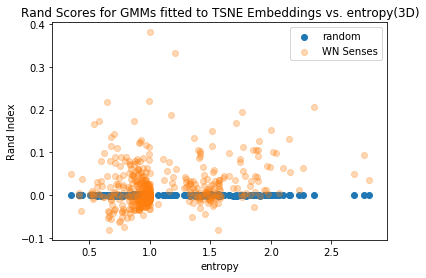

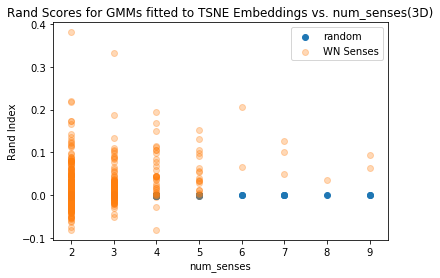

In [102]:
for d in ['2D', '3D']:
    for m in ['pca', 'tsne']:
        for v in ['entropy', 'num_senses']:
            plt.subplots()
            if d == '2D':
                plot_metric_ri(v, two_pc, m, d)
            else:
                plot_metric_ri(v, three_pc, m, d)


In [56]:
from adjustText import adjust_text


In [83]:
def plot_ent_ri_txt(ent, df, method, dims):
    #plt.scatter(ent, df['Random Mean_' + method], label = 'random')
    x = ent
    y = df['WordNet Mean_' + method]
    labels = df['Lemma']
    
    plt.scatter(ent, df['WordNet Mean_' + method])
    texts = []
    i = 0
    for x, y, s in zip(x, y, labels):
        texts.append(plt.text(x, y, s))
    plt.xlabel("Entropy")
    plt.ylabel("Rand Index")
    plt.title("Rand Scores for GMMs fitted to " + method.upper() + " Embeddings " + "vs. Entropy" + '(' + dims + ')')
    adjust_text(texts, force_points=0.2, force_text=0.2,
            expand_points=(1, 1), expand_text=(1, 1),
            arrowprops=dict(arrowstyle="-", color='black', lw=0.5))



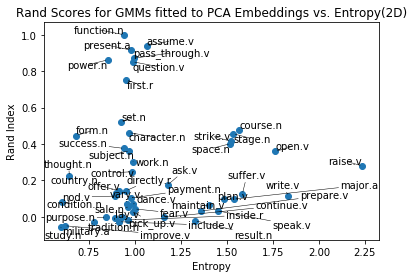

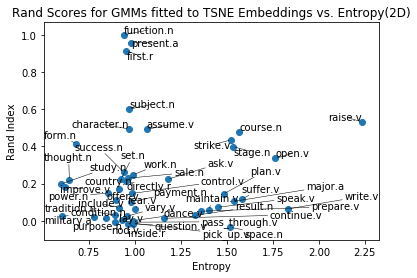

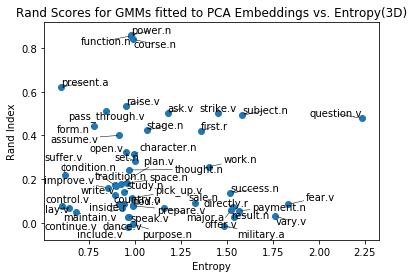

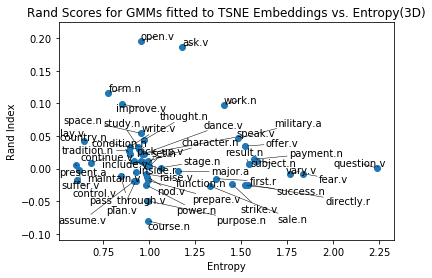

In [84]:
samp_two = two_pc.sample(50)
samp_three = three_pc[three_pc['Lemma'].isin(samp_two['Lemma'])]
samp_ent = samp_two['entropy']
for d in ['2D', '3D']:
    for m in ['pca', 'tsne']:
        plt.subplots(0, cnt)
        if d == '2D':
            plot_ent_ri_txt(samp_ent, samp_two, m, d)
        else:
            plot_ent_ri_txt(samp_ent, samp_three, m, d)
        cnt += 1

In [85]:
def scatter_gmm_results(x_col, df, x_metric, y_metric, method, dims):
    #plt.scatter(ent, df['Random Mean_' + method], label = 'random')
    x = df[x_col]
    y = df['WordNet Mean_' + method]
    labels = df['Lemma']
    
    plt.scatter(ent, df['WordNet Mean_' + method])
    texts = []
    i = 0
    for x, y, s in zip(x, y, labels):
        texts.append(plt.text(x, y, s))
    plt.xlabel("Entropy")
    plt.ylabel("Rand Index")
    plt.title("Rand Scores for GMMs fitted to " + method.upper() + " Embeddings " + "vs. " + x_metric + '(' + dims + ')')
    
    #adjust_text(texts, force_points=0.2, force_text=0.2,
     #       expand_points=(1, 1), expand_text=(1, 1),
      #      arrowprops=dict(arrowstyle="-", color='black', lw=0.5))



In [ ]:
scatter_gmm_results('entropy', )